In [1]:
from maelzel.core import *
import csoundengine as ce
import pitchtools as pt
from maelzel.snd.audiosample import Sample

In [2]:
setScoreStruct(r'''
    4/4, 60
    4/4, 120
''')

Clip(source=../snd/piano-pitchtest-Cmaj.flac, numChannels=1, sr=44100, dur=1186337243678751/70368744177664, sourcedursecs=10.429secs)
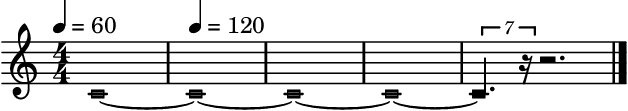

In [3]:
cl = Clip("../snd/piano-pitchtest-Cmaj.flac", pitch=60, speed=1)
cl

In [4]:
cl.play()




--Csound version 6.19 (double samples) Jan 13 2024
[commit: c53556fbbb69d14554a4a4bd91efa441a1701d70]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_clip_diskin=501.0002 start=1.852 dur=10.429 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/piano-pitchtest-Cmaj.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=60 …)

In [4]:
ev = cl.play()
ev.automate('speed', (0, 0.25, cl.dur, 2))
ev




--Csound version 6.19 (double samples) Jan 13 2024
[commit: c53556fbbb69d14554a4a4bd91efa441a1701d70]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_clip_diskin=501.0002 start=0.854 dur=10.429 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/piano-pitchtest-Cmaj.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=60 …)

OfflineRenderer(sr=44100)
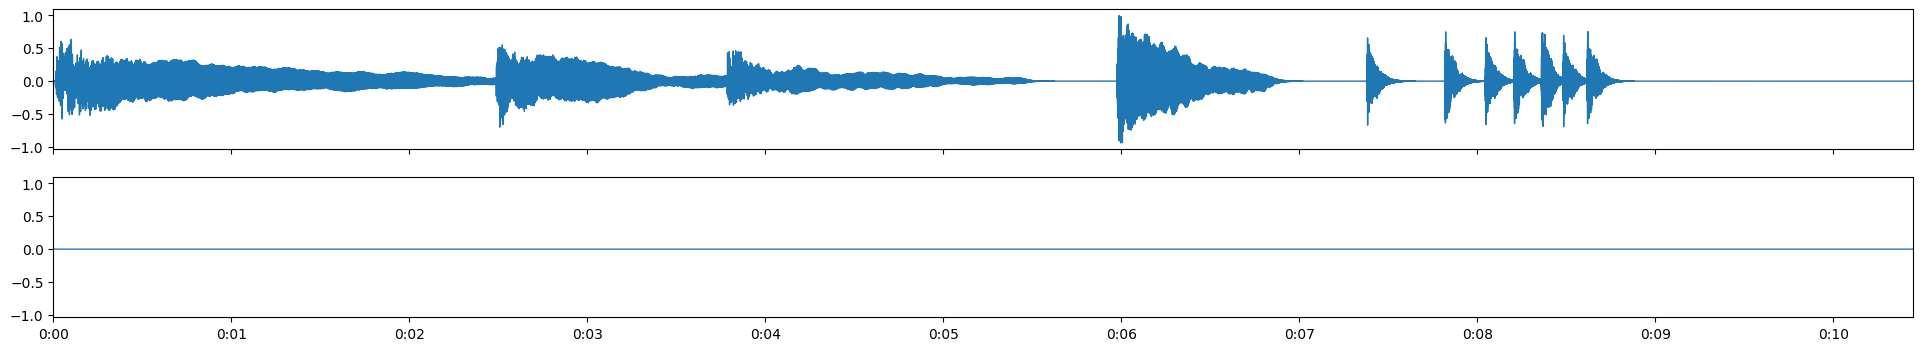

In [6]:
with render(show=True):
    ev = cl.play()
    ev.automate('speed', (0, 0.25, cl.dur*0.5, 2))


In [8]:
# This might result in unsynched playback, see below for the correct way

n = Note("7c", 1)

samp = cl.asSample()

gr1 = n.play(fade=0)
gr2 = cl.play(position=0)
gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
gr2.set(speed=0.5, delay=4)
sampsynth = samp.play(engine=playSession().engine)
sampsynth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
sampsynth.set(speed=0.5, delay=4)
    


In [9]:
n = Note("7c", 1)

samp = cl.asSample()

with play() as s:
    gr1 = n.play(fade=0)
    gr2 = cl.play(position=0)
    gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
    gr2.set(speed=0.5, delay=4)
    sampsynth = s.playSample(samp)
    sampsynth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
    sampsynth.set(speed=0.5, delay=4)
    
s.synthgroup

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=3)
    Synth(𝍪 preset:sin=502.0004 start=78.459 dur=1.000 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0 ifadein=0 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 p17=96 p18=0.515178 p19=1 p20=96 …)
    Synth(𝍪 preset:_clip_diskin=501.0005 start=78.459 dur=10.429 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/piano-pitchtest-Cmaj.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=60 …)
    Synth(𝍪 .playSample=503.0004 start=78.459 dur=-1.000 p4=105 isndtab=0 istart=0.05 ifadein=0.05 ifadeout=1 kchan=1 kspeed=1 kgain=0.5 kpan=-1)

OfflineRenderer(sr=44100)
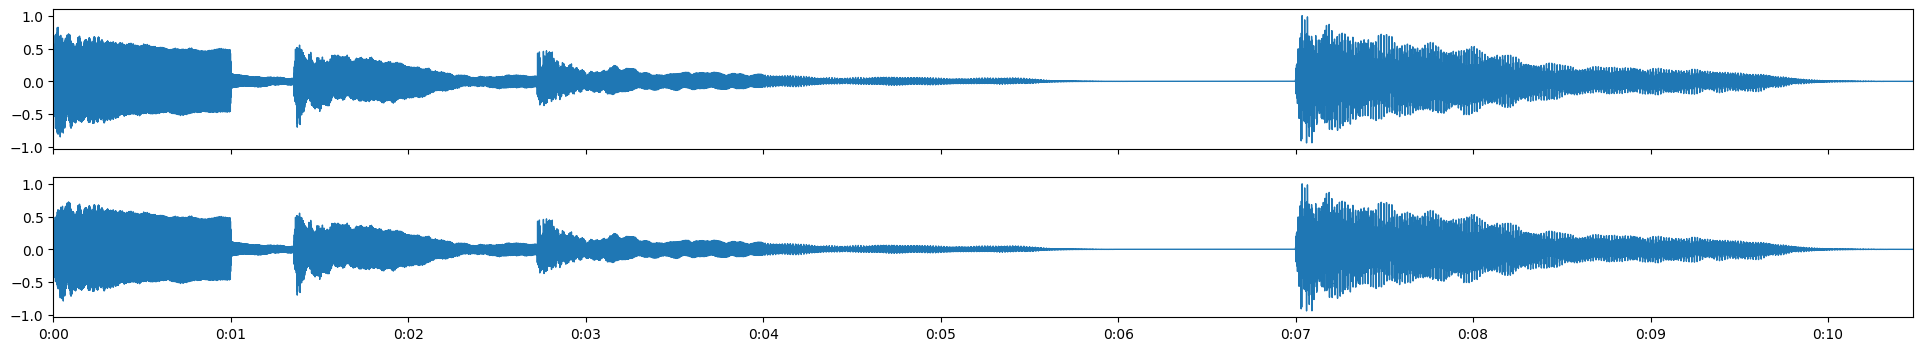

In [11]:
n = Note("7c", 1)

samp = cl.asSample()
session = playSession()

with render(endtime=20) as r:
    gr1 = n.play(fade=0)
    gr2 = cl.play(position=0)
    gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
    gr2.set(speed=0.5, delay=4)
    sampsynth = r.playSample((samp.samples, samp.sr), pos=1)
    sampsynth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
    sampsynth.set(speed=0.5, delay=4)
    
r

In [12]:
from maelzel.snd.audiosample import Sample

In [13]:
s = Sample("../snd/piano-pitchtest-Cmaj.flac")
s.fundamentalFreq()

LibXtract compiled with ooura FFT


mnOut size: 22
m_pitchTrack size: 22


527.52392578125

In [14]:
s.play(skip=s.firstSound()-0.01)




--Csound version 6.19 (double samples) Jan 13 2024
[commit: c53556fbbb69d14554a4a4bd91efa441a1701d70]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(𝍪 .playSample=501.0002 start=0.301 dur=-1.000 p4=104 isndtab=-0.01 istart=0.05 ifadein=0.05 ifadeout=1 kchan=1 kspeed=1 kgain=0 kpan=-1)

mnOut size: 899
m_pitchTrack size: 899


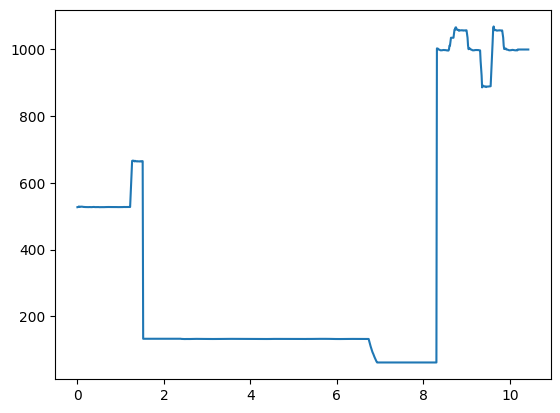

In [15]:
f0 = s.fundamentalBpf()
f0.plot()

In [16]:
mask = f0 > 0

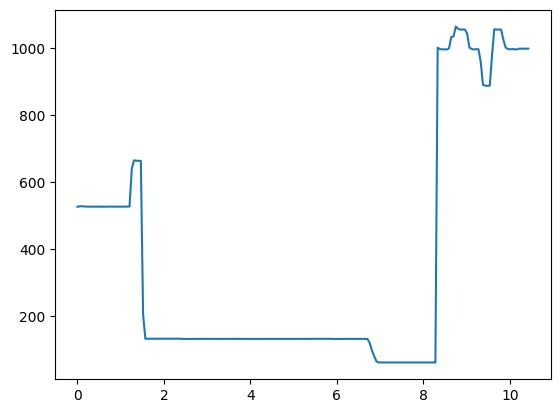

In [17]:
(f0 * mask).plot()

In [19]:
f0 = s[0.16:0.5].fundamentalBpf()

mnOut size: 30
m_pitchTrack size: 30


In [20]:
f0.ys[f0.ys>0].mean()

528.0751889985183

## Test sample rate

In [11]:
cl = Clip("../snd/voiceover-fragment-48k.flac")

LibXtract compiled with ooura FFT


mnOut size: 24
m_pitchTrack size: 24


In [12]:
cl.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_clip_diskin=502.0008 start=111.176 dur=8.926 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/voiceover-fragment-48k.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=48.8273 …)

In [13]:
s = Sample("../snd/voiceover-fragment-48k.flac")
s = s.getChannel(0, contiguous=True)
cl2 = Clip((s.samples, s.sr))


mnOut size: 24
m_pitchTrack size: 24


In [14]:
cl2.play()

error:  Variable 'ipos' used before defined
Line 83

ERROR:csoundengine:compileOrcAsync error: 
error:  Variable type for ipos could not be determined.

Parsing failed due to syntax errors
Stopping on parser failure
ERROR:csoundengine:001  
002  instr 504  
003      ; common case (2 breakpoints is the minimum for a simple note)
004  kpos       = p5
005  kgain      = p6
006  idataidx_  = p7
007  inumbps    = p8
008  ibplen     = p9
009  ichan      = p10
010  ifadein    = p11
011  ifadeout   = p12
012  ipchintrp_ = p13
013  ifadekind  = p14
014  isndtab    = p15
015  istart     = p16
016  kspeed     = p17
017  ixfade     = p18
018  if inumbps == 2 && ipchintrp_ == 0 then
019      i__t = p(idataidx_ + ibplen)
020      i__pitch0 = p(idataidx_ + 1)
021      i__pitch1 = p(idataidx_ + 1 + ibplen)
022      i__amp0 = p(idataidx_ + 2)
023      i__amp1 = p(idataidx_ + 2 + ibplen)
024      kamp = linseg:k(i__amp0, i__t, i__amp1)
025      kpitch = linseg:k(i__pitch0, i__t, i__pitch1)
026      kfreq

CsoundError: Could not compile body for instr 'preset:_playtable'

In [2]:
s3 = Sample("../snd/voiceover-fragment-88k2.flac")
s3 = s3.getChannel(0, contiguous=True)
cl3 = Clip((s3.samples, s3.sr))
cl3.play()




--Csound version 6.19 (double samples) Dec 20 2022
[commit: cd2cbc6494d1cefaaa357abf7c94e54e4d2e2868]
libsndfile-1.0.31
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 1024-byte blks of shorts from adc:system:capture (RAW)
writing 512 sample blks of 64-bit floats to dac:system:playback
SECTION 1:


LibXtract compiled with ooura FFT


mnOut size: 22
m_pitchTrack size: 22


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset._playtable:501.0002, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=1 ichan:9=1 ipos:10=-1 ifadein:11=0.02 ifadeout:12=0.02 ipchintrp_:13=0 ifadekind:14=1 isndtab:15=104 istart:16=0 kspeed:17=1 ixfade:18=-1 p19=0 p20=1B-08 p21=1 ...)